In [1]:
# automatically reload dependant notebooks
%load_ext autoreload
%autoreload 2
import import_ipynb

# Tests of Elementary Graph Algorithms

This notebook contains tests for the algorithms implemented in the [`ega.ipynb`](./ega.ipynb) notebook. In an ordinary Python project, we would use the standard unit testing framework. But in these notebooks, we write our own tests.

## test BFS

Here, we test `bft()` using the undirected graph shown in Figure 20.3 p.557. `bft()` uses `bfs()`. After we extracted the BFT, we assert that $|E| = |V| - 1$, as stated in Throrem B.2 *Properties of free trees* p.1169.

importing Jupyter notebook from graph.ipynb
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
importing Jupyter notebook from util.ipynb
importing Jupyter notebook from ega.ipynb
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
BFS
  s None 0
    [r,u,v]
  r ^s 1
    [s,t,w]
  t ^r 2
    [r,u]
  u ^s 1
    [s,t,y]
  v ^s 1
    [s,w,y]
  w ^r 2
    [r,v,x,z]
  x ^w 3
    [w,y,z]
  y ^u 2
    [u,v,x]
  z ^w 3
    [w,x]
  s-r 
  s-u 
  s-v 
  r-s 
  r-t 
  r-w 
  t-r 
  t-u 
  u-s 
  u-t 
  u-y 
  v-s 
  v-w 
  v-y 
  w-r 
  w-v 
  w-x 
  w-z 
  x-w 
  x-y 
  x-z 
  y-u 
  y-v 
  y-x 
  z-w 
  z-x 


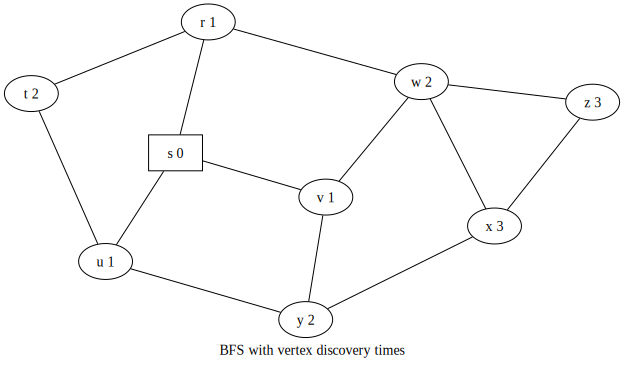

In [2]:
from graph import *
from ega import *

def makeBFG() -> LstGraph:
  vt = ["s", "r", "t", "u", "v", "w", "x", "y", "z"]
  et = [
    "s-r", "s-u", "s-v",
    "r-s", "r-t", "r-w",
    "t-r", "t-u",
    "u-s", "u-t", "u-y",
    "v-s", "v-w", "v-y",
    "w-r", "w-v", "w-x", "w-z",
    "x-w", "x-y", "x-z",
    "y-u", "y-v", "y-x",
    "z-w", "z-x", ]
  g = LstGraph("BFS")
  g.makeVE(vt, et)
  return g

bg = makeBFG()
bg = bfs(bg, bg.getV("s"))
print(bg)
draw(bg, directed=False, label=f"{bg.tag} with vertex discovery times")

Now, we test the `bft()` that tries to discover a BFT within a BFS graph.

BFS†
  s None 0
    [r,u,v]
  r ^s 1
    [t,w]
  t ^r 2
    []
  u ^s 1
    [y]
  v ^s 1
    []
  w ^r 2
    [x,z]
  x ^w 3
    []
  y ^u 2
    []
  z ^w 3
    []
  s-r 
  r-t 
  s-u 
  s-v 
  r-w 
  w-x 
  u-y 
  w-z 


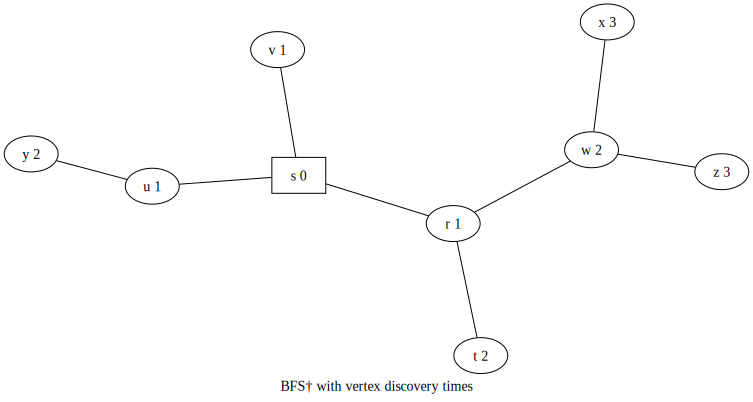

In [3]:
bs = bg.getV("s")
bt = bft(bg, bs)
assert(bt.numEE() == bt.numVV() - 1) # Theorem B.2 p.1169
print(bt)
draw(bt, directed=False, label=f"{bt.tag} with vertex discovery times")

## test DFS

We now test `dfs()` using the directed graph shown in Figure 20.4 p.566.

DFS
  u None 1/8
    [v,x]
  v ^u 2/7
    [y]
  w None 9/12
    [y,z]
  x ^y 4/5
    [v]
  y ^v 3/6
    [x]
  z ^w 10/11
    [z]
  u-v T
  u-x F
  v-y T
  w-y C
  w-z T
  x-v B
  y-x T
  z-z B


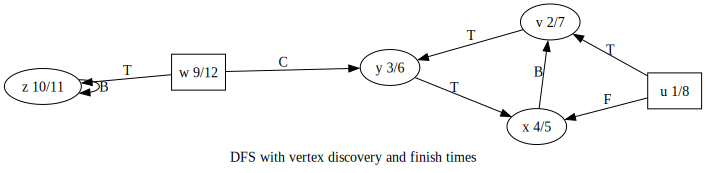

In [4]:
def makeDFG() -> LstGraph:
  vt = ["u", "v", "w", "x", "y", "z"]
  et = [  # directed edges
    "u-v", "u-x",
    "v-y",
    "w-y", "w-z",
    "x-v",
    "y-x",
    "z-z", ]
  g = LstGraph("DFS")
  g.makeVE(vt, et)
  return g

dg = makeDFG()
dg = dfs(dg)
print(dg)
draw(dg, directed=True, label=f"{dg.tag} with vertex discovery and finish times")

We then run `dff()` on the DFS graph to obtain a DFF.

DFS†
  u None 1/8
    [v]
  v ^u 2/7
    [y]
  w None 9/12
    [z]
  x ^y 4/5
    []
  y ^v 3/6
    [x]
  z ^w 10/11
    []
  u-v T
  y-x T
  v-y T
  w-z T


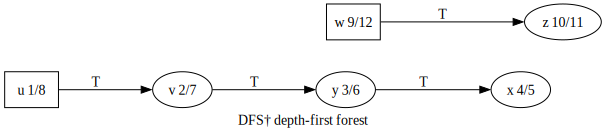

In [5]:
df = dff(dg)
print(df)
draw(df, directed=True, label=f"{df.tag} depth-first forest")

A property of DFS is that it forms a parenthetical structure, as proven in Theorem 20.7 *Parenthesis theorem* p.567. We confirm that our DFS graph possesses these properties by directly translating the three conditions enumerated in the theorem into code.

In [6]:
for e in dg.getEE():
  u = e.u
  v = e.v
  ui = Intv(u.dis, u.fin)
  vi = Intv(v.dis, v.fin)
  assert ((ui.isDisjoint(vi) and not df.isDescendant(u, v) and not df.isDescendant(v, u)) or
          (ui.isInside(vi) and df.isDescendant(u, v) or
          (vi.isInside(ui) and df.isDescendant(v, u))))

## test TSort

We shall check `tsort()` to against the DAG shown in Figure 20.7 p.574. We use the `circo` circular layout engine to get a more compact display.

watch None 17/18
undershorts None 15/16
socks None 13/14
shirt None 9/12
tie ^shirt 10/11
pants None 5/8
shoes ^pants 6/7
belt None 1/4
jacket ^belt 2/3


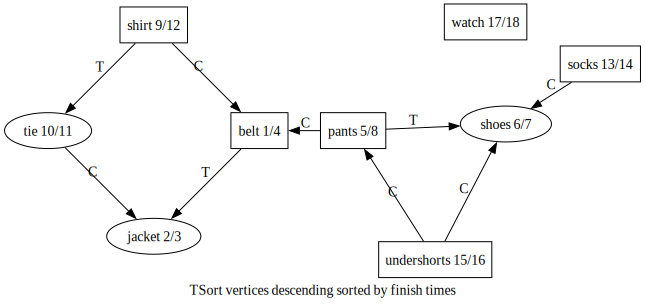

In [7]:
def makeTSG() -> LstGraph:
  vt = ["belt", "jacket", "pants", "shirt", "shoes", "socks", "tie", "undershorts", "watch"]
  et = [  # directed edges
    "belt-jacket",
    "pants-belt", "pants-shoes",
    "shirt-belt", "shirt-tie",
    "socks-shoes",
    "tie-jacket",
    "undershorts-pants", "undershorts-shoes", ]
  g = LstGraph("TSort")
  g.makeVE(vt, et)
  return g

sg = makeTSG()
sv = tsort(sg)
for u in sv: print(u)
draw(sg, directed=True, label=f"{sg.tag} vertices descending sorted by finish times", engine="circo")

## test SCC

We test `scc()` against the digraph show in Figure 20.9 p.577.

SCC₵
  a+e+b None 
    [g+f,c+d]
  c+d None 
    [g+f,h]
  g+f None 
    [h]
  h None 
    []
  a+e+b-g+f 
  a+e+b-c+d 
  c+d-g+f 
  c+d-h 
  g+f-h 


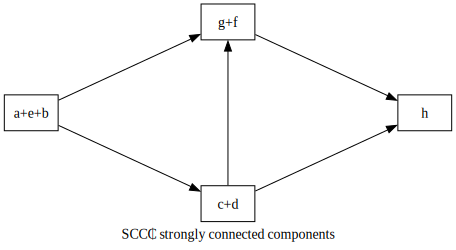

In [8]:
def makeSCG() -> LstGraph:
  vt = ["a", "b", "c", "d", "e", "f", "g", "h"]
  et = [  # directed edges
    "a-b",
    "b-c", "b-e", "b-f",
    "c-d", "c-g",
    "d-c", "d-h",
    "e-a", "e-f",
    "f-g",
    "g-f", "g-h",
    "h-h", ]
  g = LstGraph("SCC")
  g.makeVE(vt, et)
  return g

cg = makeSCG()
cg = scc(cg)
print(cg)
draw(cg, directed=True, label=f"{cg.tag} strongly connected components")